## Clustering and dimensionality reduction

Download the Breast Cancer Wisconsin (Diagnostic) dataset from here. Do
not use the “IMPORT IN PYTHON” option, just grab the zip file and unzip it. You will end up with two files: wdbc.data which is the data itself and
wdbc.names which describes the data. As you can read, the data can be used
to learn a classifier which uses 30 real-valued features to distinguish between
benign and malignant tumours.

In this section you are asked to compare the clusters produced by Gaussian mixture clustering to the true classes. But instead of clustering the data
as is, you are first asked to use PCA to reduce the dimensionality down to 2
dimensions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA, PCA
from sklearn.decomposition import FastICA
from sklearn.mixture import GaussianMixture
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

#### Task 4

Use PCA to reduce the data (without the class labels) from 30 dimensions to 2 dimensions and produce a scatter plot of this 2-dimensional
data using colours to indicate the class label of each data point. In addition, in your report, state how much variance is explained by the
first principal component and how much is explained by the second.

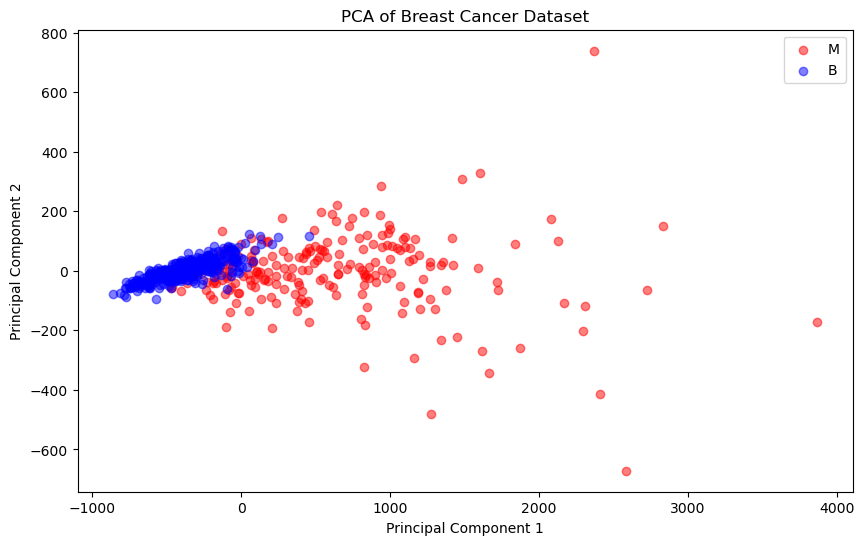

Explained variance by the first component: 443782.6051465963
Explained variance by the second component: 7310.100061653351
Explained variance ratio by the first component: 0.9820446715106617
Explained variance ratio by the second component: 0.01617648986351103


In [2]:
# Path to the data file
data_file_path = 'breast+cancer+wisconsin+diagnostic/wdbc.data'  # Replace with the actual path to the 'wdbc.data' file

# Read the dataset into a DataFrame, specifying that the first column is the index
data = pd.read_csv(data_file_path, header=None, index_col=0)

# The first column in the data now is the class label (M = malignant, B = benign)
# The rest of the columns are the features
labels = data[1]  # Class labels
features = data.loc[:, 2:]  # Features

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features)

# Variance explained by the first and second principal components
explained_variance = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

# Creating a scatter plot
plt.figure(figsize=(10, 6))
for label, color in zip(('M', 'B'), ('red', 'blue')):
    plt.scatter(features_2d[labels == label, 0], features_2d[labels == label, 1], 
                label=label, c=color, alpha=0.5)

plt.title("PCA of Breast Cancer Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.savefig("clustering1.png")
plt.show()

# Print the explained variance
print("Explained variance by the first component:", explained_variance[0])
print("Explained variance by the second component:", explained_variance[1])

# Print the explained variance's ratios
print("Explained variance ratio by the first component:", explained_variance_ratio[0])
print("Explained variance ratio by the second component:", explained_variance_ratio[1])

#### Task 5

Fit a Gaussian mixture model with 2 components using the 2-dimensional
data and display the (soft) clusters using a scatter plot. The colour of
each point in the scatter plot should represent the responsibilities associated with that point—so there will be more than 2 colours in your
scatter plot. (The rightmost plot on slide 6 of the lecture on k-means
and mixtures of Gaussians is an example of this sort of plot.)

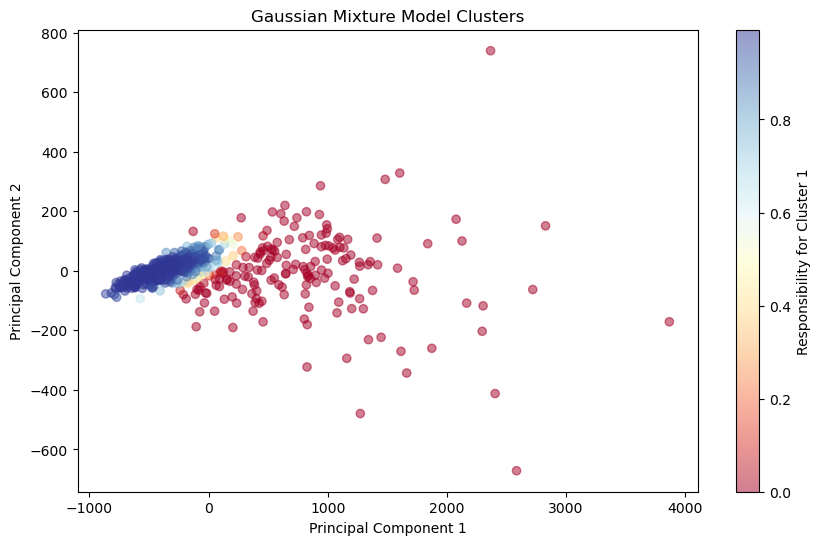

In [3]:
# Assuming 'features_2d' is your 2D PCA-reduced data from the previous steps

# Fitting a Gaussian Mixture Model with 2 components
gmm = GaussianMixture(n_components=2)
gmm.fit(features_2d)

# Predicting the responsibilities (soft clusters)
responsibilities = gmm.predict_proba(features_2d)

# Creating a scatter plot with colors representing the responsibilities
plt.figure(figsize=(10, 6))
scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], 
                      c=responsibilities[:, 0], cmap='RdYlBu', alpha=0.5)

plt.title("Gaussian Mixture Model Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label='Responsibility for Cluster 1')
plt.savefig("clustering2.png")
plt.show()

#### Task 6

You now have 2 different sorts of (coloured) scatter plot. Identify
the main differences between them and explain these differences.

#### Task 7

Use an SVM approach to learn a classifier from the first 450 datapoints of the Breast Cancer Wisconsin (Diagnostic) dataset and report
its accuracy on the the last 119 datapoints (i.e. use these 119 datapoints as a test set). Attempt to maximise the test set accuracy by
choosing an appropriate kernel and appropriate degree of regularisation. Feel free to score candidate SVM predictors on the test set to see
what works best (so the test set is really acting as a validation set, not
a test set in the strict sense)

In [6]:
#print(data.shape)
#print(data.head())

# Splitting the labels and features
labels = data[1]
features = data.loc[:, 2:]
#print(features.head())

# Splitting the dataset into training and testing (validation) sets
# First 450 data points for training, the last 119 data points for testing
X_train, X_test = features.iloc[:450], features.iloc[450:]
y_train, y_test = labels.iloc[:450], labels.iloc[450:]

# Scaling the features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Trying different kernels and regularization parameters
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C_values = [0.1, 1, 10, 100]
best_accuracy = 0
best_kernel = ''
best_C = 0

for kernel in kernels:
    for C in C_values:
        svm_model = SVC(kernel=kernel, C=C)
        svm_model.fit(X_train, y_train)
        y_pred = svm_model.predict(X_test)
        #accuracy = accuracy_score(y_test, y_pred)
        
        score = svm_model.score(X_train, y_train)       # First view the training score, this is still important to measure.
        print("The training score accuracy is: ", score)
        accuracy_score = svm_model.score(X_test, y_test)         # Test data, the model has never seen this data
        print("Accuracy on test data is: ", accuracy_score)
        
        #print("Accuracy:", accuracy_score)
        print("Kernel:", kernel)
        print("C Value:", C)
        print()
        
        if accuracy_score > best_accuracy:
            best_accuracy = accuracy_score
            best_kernel = kernel
            best_C = C
        
        '''
        if accuracy_score > best_accuracy and score-accuracy_score>0:
            best_accuracy = accuracy_score
            best_kernel = kernel
            best_C = C
        elif accuracy_score == best_accuracy and C<best_C and score-accuracy_score>0:
            best_accuracy = accuracy_score
            best_kernel = kernel
            best_C = C
        '''
        
print("Best Accuracy:", best_accuracy)
print("Best Kernel:", best_kernel)
print("Best C Value:", best_C)

The training score accuracy is:  0.9622222222222222
Accuracy on test data is:  0.9243697478991597
Kernel: linear
C Value: 0.1

The training score accuracy is:  0.9711111111111111
Accuracy on test data is:  0.9411764705882353
Kernel: linear
C Value: 1

The training score accuracy is:  0.9688888888888889
Accuracy on test data is:  0.957983193277311
Kernel: linear
C Value: 10

The training score accuracy is:  0.9688888888888889
Accuracy on test data is:  0.9495798319327731
Kernel: linear
C Value: 100

The training score accuracy is:  0.8822222222222222
Accuracy on test data is:  0.9327731092436975
Kernel: poly
C Value: 0.1

The training score accuracy is:  0.9088888888888889
Accuracy on test data is:  0.9495798319327731
Kernel: poly
C Value: 1

The training score accuracy is:  0.9111111111111111
Accuracy on test data is:  0.957983193277311
Kernel: poly
C Value: 10

The training score accuracy is:  0.9244444444444444
Accuracy on test data is:  0.9411764705882353
Kernel: poly
C Value: 100



#### Task 8

Repeat the previous task but now use the 2-dimensional dataset
(plus class labels) produced earlier via PCA. 

In [7]:
# Splitting the labels and features
labels = data[1]
features = data.loc[:, 2:]

# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features)

# Splitting the dataset into training and testing sets
# First 450 data points for training, the last 119 data points for testing
X_train_2d, X_test_2d = features_2d[:450], features_2d[450:]
y_train_2d, y_test_2d = labels.iloc[:450], labels.iloc[450:]

# Trying different kernels and regularization parameters
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
#C_values = [0.05, 0.1, 0.5, 1, 8, 9, 10, 100]
C_values = [0.1, 1, 10, 100]
best_accuracy_2d = 0
best_kernel_2d = ''
best_C_2d = 0

for kernel in kernels:
    for C in C_values:
        svm_model_2d = SVC(kernel=kernel, C=C)
        svm_model_2d.fit(X_train_2d, y_train_2d)
        y_pred_2d = svm_model_2d.predict(X_test_2d)
        #accuracy_2d = accuracy_score(y_test_2d, y_pred_2d)
        
        #y_pred_2d_validate = svm_model_2d.predict(X_train_2d)
        #accuracy_2d = accuracy_score(y_test_2d, y_pred_2d)
        score = svm_model_2d.score(X_train_2d, y_train_2d)       # First view the training score, this is still important to measure.
        print("The training score is: ", score)
        accuracy_score = svm_model_2d.score(X_test_2d, y_test_2d)         # Test data, the model has never seen this data
        print("Accuracy on test data is: ", accuracy_score)
        
        #print("Accuracy:", accuracy_2d)
        #print("Accuracy:", accuracy_score)
        print("Kernel:", kernel)
        print("C Value:", C)
        print()
        if accuracy_score > best_accuracy_2d:
            best_accuracy_2d = accuracy_score
            best_kernel_2d = kernel
            best_C_2d = C
        
        '''
        if accuracy_score > best_accuracy_2d and score-accuracy_score>0:
            best_accuracy_2d = accuracy_score
            best_kernel_2d = kernel
            best_C_2d = C
        elif accuracy_score == best_accuracy_2d and C<best_C_2d and score-accuracy_score>0:
            best_accuracy_2d = accuracy_score
            best_kernel_2d = kernel
            best_C_2d = C
        '''
        
print("Best Accuracy:", best_accuracy_2d)
print("Best Kernel:", best_kernel_2d)
print("Best C Value:", best_C_2d)



The training score is:  0.9288888888888889
Accuracy on test data is:  0.9327731092436975
Kernel: linear
C Value: 0.1

The training score is:  0.9288888888888889
Accuracy on test data is:  0.9327731092436975
Kernel: linear
C Value: 1

The training score is:  0.9311111111111111
Accuracy on test data is:  0.9243697478991597
Kernel: linear
C Value: 10

The training score is:  0.9333333333333333
Accuracy on test data is:  0.907563025210084
Kernel: linear
C Value: 100

The training score is:  0.7977777777777778
Accuracy on test data is:  0.9243697478991597
Kernel: poly
C Value: 0.1

The training score is:  0.8422222222222222
Accuracy on test data is:  0.9159663865546218
Kernel: poly
C Value: 1

The training score is:  0.86
Accuracy on test data is:  0.9327731092436975
Kernel: poly
C Value: 10

The training score is:  0.9133333333333333
Accuracy on test data is:  0.907563025210084
Kernel: poly
C Value: 100

The training score is:  0.9066666666666666
Accuracy on test data is:  0.94957983193277